In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aufabi/belajar-git/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Understanding

Pada data ini, terdapat 7043 baris dimana di setiap barisnya berisi tentang deskripsi customer yang berkaitan dengan churn atau tidak churn nya customer tersebut. Terdapat 21 kolom pada data ini yang terdiri atas:

1. Identitas customer
* CustomerID: sebuah kombinasi huruf dan angka yang unik untuk setiap customer
* Gender: jenis kelamin customer yaitu Male atau Female
* SeniorCitizen: sebuah data kategorikal dengan 1 berarti seorang yang sudah tua dan 0 tidak
* Partner: apakah customer memiliki pasangan maka diisi dengan Yes dan bila tidak maka No
* Dependents: apakah customer memiliki tanggungan atau tidak

2. Fasilitas yang dimiliki oleh customer
* PhoneService: apakah customer memiliki layanan telfon
* MultipleLines: apakah customer memiliki banyak jaringan atau tidak atau bahkan tidak mempunyai layanan telfon
* InternetService: layanan internet yang dimiliki oleh customer apakah Fiber Optic atau DSL atau tidak punya layanan internet
* OnlineSecurity: apakah customer memiliki keamanan online atau bahkan tidak punya layanan internet
* OnlineBackup: apakah customer memiliki backup online atau bahkan tidak punya layanan internet
* DeviceProtection: apakah customer memiliki perlindungan perangkat atau bahkan tidak punya layanan internet
* TechSupport: apakah customer memiliki bantuan tech atau bahkan tidak punya layanan internet
* StreamingTV: apakah customer memiliki streaming TV atau bahkan tidak punya layanan internet
* StreamingMovies: apakah customer memiliki streaming film atau bahkan tidak punya layanan internet


3. Kondisi langganan customer ke perusahaan
* Tenure: sudah berapa bulan customer berlangganan ke perusahaan
* Contract: lama kontrak customer apakah bulanan, tahunan, atau dua tahunan
* PaperlessBilling: apakah customer memiliki tagihan tanpa kertas
* PaymentMethod: metode pembayaran customer yang terdiri atas Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
* MonthlyCharges: besar tagihan bulanan
* TotalCharges: besar total tagihan
* Churn: apakah customer menghentikan langganannya atau tidak





# 1. Data Cleaning

Dari df.info di atas kita bisa lihat bahwa kolom total charges yang seharusnya numeric malah bertipe object. Oleh karena itu, kita perlu mengganti tipe data pada kolom tersebut. Namun, sebelum itu, kita akan cek kondisi value dari setiap kolom terlebih dahulu.

In [ ]:
for x in df.columns:
  print(f'{x}:')
  print(f'{df[x].unique()}\n')

customerID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender:
['Female' 'Male']

SeniorCitizen:
[0 1]

Partner:
['Yes' 'No']

Dependents:
['No' 'Yes']

tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService:
['No' 'Yes']

MultipleLines:
['No phone service' 'No' 'Yes']

InternetService:
['DSL' 'Fiber optic' 'No']

OnlineSecurity:
['No' 'Yes' 'No internet service']

OnlineBackup:
['Yes' 'No' 'No internet service']

DeviceProtection:
['No' 'Yes' 'No internet service']

TechSupport:
['No' 'Yes' 'No internet service']

StreamingTV:
['No' 'Yes' 'No internet service']

StreamingMovies:
['No' 'Yes' 'No internet service']

Contract:
['Month-to-month' 'One year' 'Two year']

PaperlessBilling:
['Yes' 'No']

PaymentMethod:
['Electronic check' 'Mailed check' 'Bank tra

Didapat bahwa kolom-kolom lain tidak ada masalah tipe data. Jadi sekarang kita akan ubah tipe data dari kolom TotalCharges. Akan tetapi, kita cek dahulu apakah ada missing value pada kolom TotalCharges

In [ ]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Ternyata terdapat data kosong pada kolom tersebut sehingga kita bisa buat code berikut dimana data yang aneh akan diubah menjadi nan.

In [ ]:
# Kegunaan dari coerce berikut adalah mengubah data yang tidak bisa dikonversi menjadi nan
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## a. Missing Values

Oleh karena kita tadi mengubah data yang tidak bisa dikonversi menjadi nan, bisa jadi ada data yang berisi nan. Jadi bisa kita cek dahulu dengan code berikut.

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Sekarang, kita akan cek kondisi baris dimana TotalCharges nya null untuk menentukan apa yang akan kita lakukan terhadap data-data tersebut.

In [ ]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Bisa kita lihat bahwa customer yang total charges nya null ternyata memiliki tenure 0 yang berarti mereka baru saja berlangganan dengan perusahaan. Bila kita lihat dari kolom contract, mereka berlangganan 1 tahun dan 2 tahun. Jadi, ada 2 kemungkinan yang terjadi. Pertama, memang data dari perusahaan baru menulis total charges sesuai berapa lama mereka sudah ada di perusahaan sehingga data total charges nya 0 untuk tenure 0. Kedua, ada kekeliruan input dimana seharusnya total charges diisi monthly charges dikali panjang kontrak. Oleh karena itu kita harus cek apakah customer yang tenurenya 0 hanya 11 baris itu saja dan cek data lain yang contractnya one year atau two year untuk menganalisa TotalCharges.

In [ ]:
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Ternyata benar data yang tenurenya 0 hanya 11 baris itu yang juga totalcharges nya null.

In [ ]:
df[df['Contract'] == 'One year']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.30,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No


Jika kita lihat dari baris pertama, kita dapat biaya bulanan dikali panjang kontrak adalah $56.95 \times 12 = 683.4$ jauh di bawah total charges. Jika kita hitung biaya bulanan dikali tenure didapat $56.95 \times 34 = 1936.3$ yang mendekati TotalCharges. Ini lebih masuk akal daripada yang pertama karena tentunya apabila kita berlangganan tahunan terdapat diskon untuk customer. Oleh karena itu, kita isi TotalCharges yang null dengan 0 karena tenure nya baru 0.

In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [ ]:
df['TotalCharges'].isnull().sum()

0

## b. Duplicated Values

Kemudian, kita akan cek apakah terdapat data duplikat.

In [ ]:
jumlah_duplikat = df.duplicated().sum()
print(jumlah_duplikat)

0


Ternyata tidak ada data yang terduplikat pada tabel. Untuk lebih memastikan lagi, bisa kita cek duplicated data dari customer ID.

In [ ]:
df[df.duplicated(subset=['customerID'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Jelas bahwa tidak ada data terduplikat pada dataframe ini, sehingga kita bisa lanjut ke tahap berikutnya.

# 2. Exploratory Data Analysis

## a. Statistical summary of columns

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Bisa kita lihat bahwa data dari semua kolom sangat penting (kecuali customerID) untuk model sehingga kita keep semua kolom pada data termasuk customerID untuk sementara. Pertama, kita bisa analisa dahulu data-data kategorikal.

In [ ]:
data = df.describe(include = 'O').T
percentages = [f'{round(x/len(df)*100,2)} %' for x in data['freq']]
data['percentage'] = percentages
data

,count,unique,top,freq,percentage
customerID,7043,7043,7590-VHVEG,1,0.01 %
gender,7043,2,Male,3555,50.48 %
Partner,7043,2,No,3641,51.7 %
Dependents,7043,2,No,4933,70.04 %
PhoneService,7043,2,Yes,6361,90.32 %
MultipleLines,7043,3,No,3390,48.13 %
InternetService,7043,3,Fiber optic,3096,43.96 %
OnlineSecurity,7043,3,No,3498,49.67 %
OnlineBackup,7043,3,No,3088,43.84 %
DeviceProtection,7043,3,No,3095,43.94 %


Dari keterangan di atas diperoleh bahwa 50.48% data adalah male serta mayoritas status pasangan dari data tersebut adalah single. Karena ini adalah data telco maka tidak mengejutkan ketika 90.32% dari data memiliki layanan telpon. Meski tidak mencapai 50%, customer yang memiliki fiber optic untuk internet service menempati posisi pertama daripada yang menggunakan DSL ataupun tidak memiliki internet service. Sedangkan untuk fasilitas - fasilitas tambahan lain seperti multiple lines, online security, online backup, device protection, tech support, streaming TV dan streaming movies, tidak umum dimiliki oleh customer. Dalam metode langganan, nampaknya customer banyak yang belum yakin untuk berlangganan tahunan maupun dua tahunan yang bisa kita lihat dari data dimana 55.02% customer memilih untuk berlangganan bulanan. Untuk metode penagihan, kebanyakan customer lebih menyukai paperless billing dan hal ini sesuai dengan fakta bahwa metode pembayaran yang paling favorit adalah electronic check. Kita juga bisa melihat bahwa 73.46% customer tidak churn hal ini menunjukkan bahwa layanan telco sudah cukup baik sehingga masih banyak customer yang tidak churn. Namun, perusahaan tetap harus menganalisa customer yang churn agar kita bisa membatasi kemungkinan churn dari customer lain. Apabila data digunakan untuk pembelajaran model klasifikasi biner, data cenderung berat sebelah karena memiliki jumlah data customer yang tidak churn jauh di atas 50%. Sehingga perlu kita atasi sebelumnya. Solusinya adalah bisa dengan menambahkan lebih banyak data customer yang churn atau menghapus beberapa data customer yang tidak churn. Namun, untuk pembelajaran model yang lebih baik, jumlah data yang banyak sangat penting untuk melatih model sehingga solusi pertama lebih diutamakan.

Kemudian kita akan mencoba memberikan statistical summary dari data-data numerik.

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Kolom SeniorCitizen sebenarnya adalah data kategorikal dimana 1 berarti customer adalah seorang senior citizen dan 0 tidak. Namun bisa kita lihat dari Q1-Q3 dimana semua bernilai 0 serta mean yang sangat dekat ke 0 memiliki arti bahwa data ini didominasi oleh customer yang bukan SeniorCitizen. Di sisi lain, tenure terpanjang dari customer adalah 72 bulan dan paling pendek adalah 0 bulan dan ini masuk akal karena kemungkinan customer tersebut adalah pelanggan baru, apalagi sudah kita cek di atas bahwa kontrak mereka adalah one year dan two year. Apabila kita lihat dari mean dan median dari kolom ini, bisa kita peroleh bahwa selisihnya tidak terlalu jauh yang berarti data relatif terdistribusi normal. Meski demikian hal ini tetap perlu dicek menggunakan visualisasi. Standard deviasi yang cukup besar yaitu 24.55 menunjukkan bahwa ketersebaran data dari mean cukup jauh. Pada kolom monthlycharges, biaya langganan termurah adalah 18.25 dan paling mahal adalah 118.75. Apabila kita cek total charges nilai minimumnya adalah 0 yang sudah kita input dari atas karena tenure nya 0 dan maksimumnya adalah 8684.8 yang juga wajar karena ada yang sudah berlangganan hingga 72 bulan. Meskipun $72 \times 118.75 = 8550$, tapi selisihnya dengan biaya total maksimal hanya sedikit yaitu $8684.8 - 8550 = 134.8$. Hal ini berarti ada kemungkinan diantara periode berlangganan customer terdapat kenaikan biaya bulanan. Jika dilihat dari mean dan mediannya, kolom monthlycharges memiliki mean < median yang berarti data cenderung skew kiri sedangkan totalcharges memiliki mean > median yang berarti data relatif skew kanan. Namun lagi, hal ini tetap perlu diverifikasi menggunakan visualisasi.

## b. Univariate Analysis

Pertama kita akan pisah kolom-kolom kategorikal dan numerikal

In [ ]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
               'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

numerical = ['tenure',	'MonthlyCharges', 'TotalCharges']

Kemudain kita buat visualisai countplot dari kolom categorical

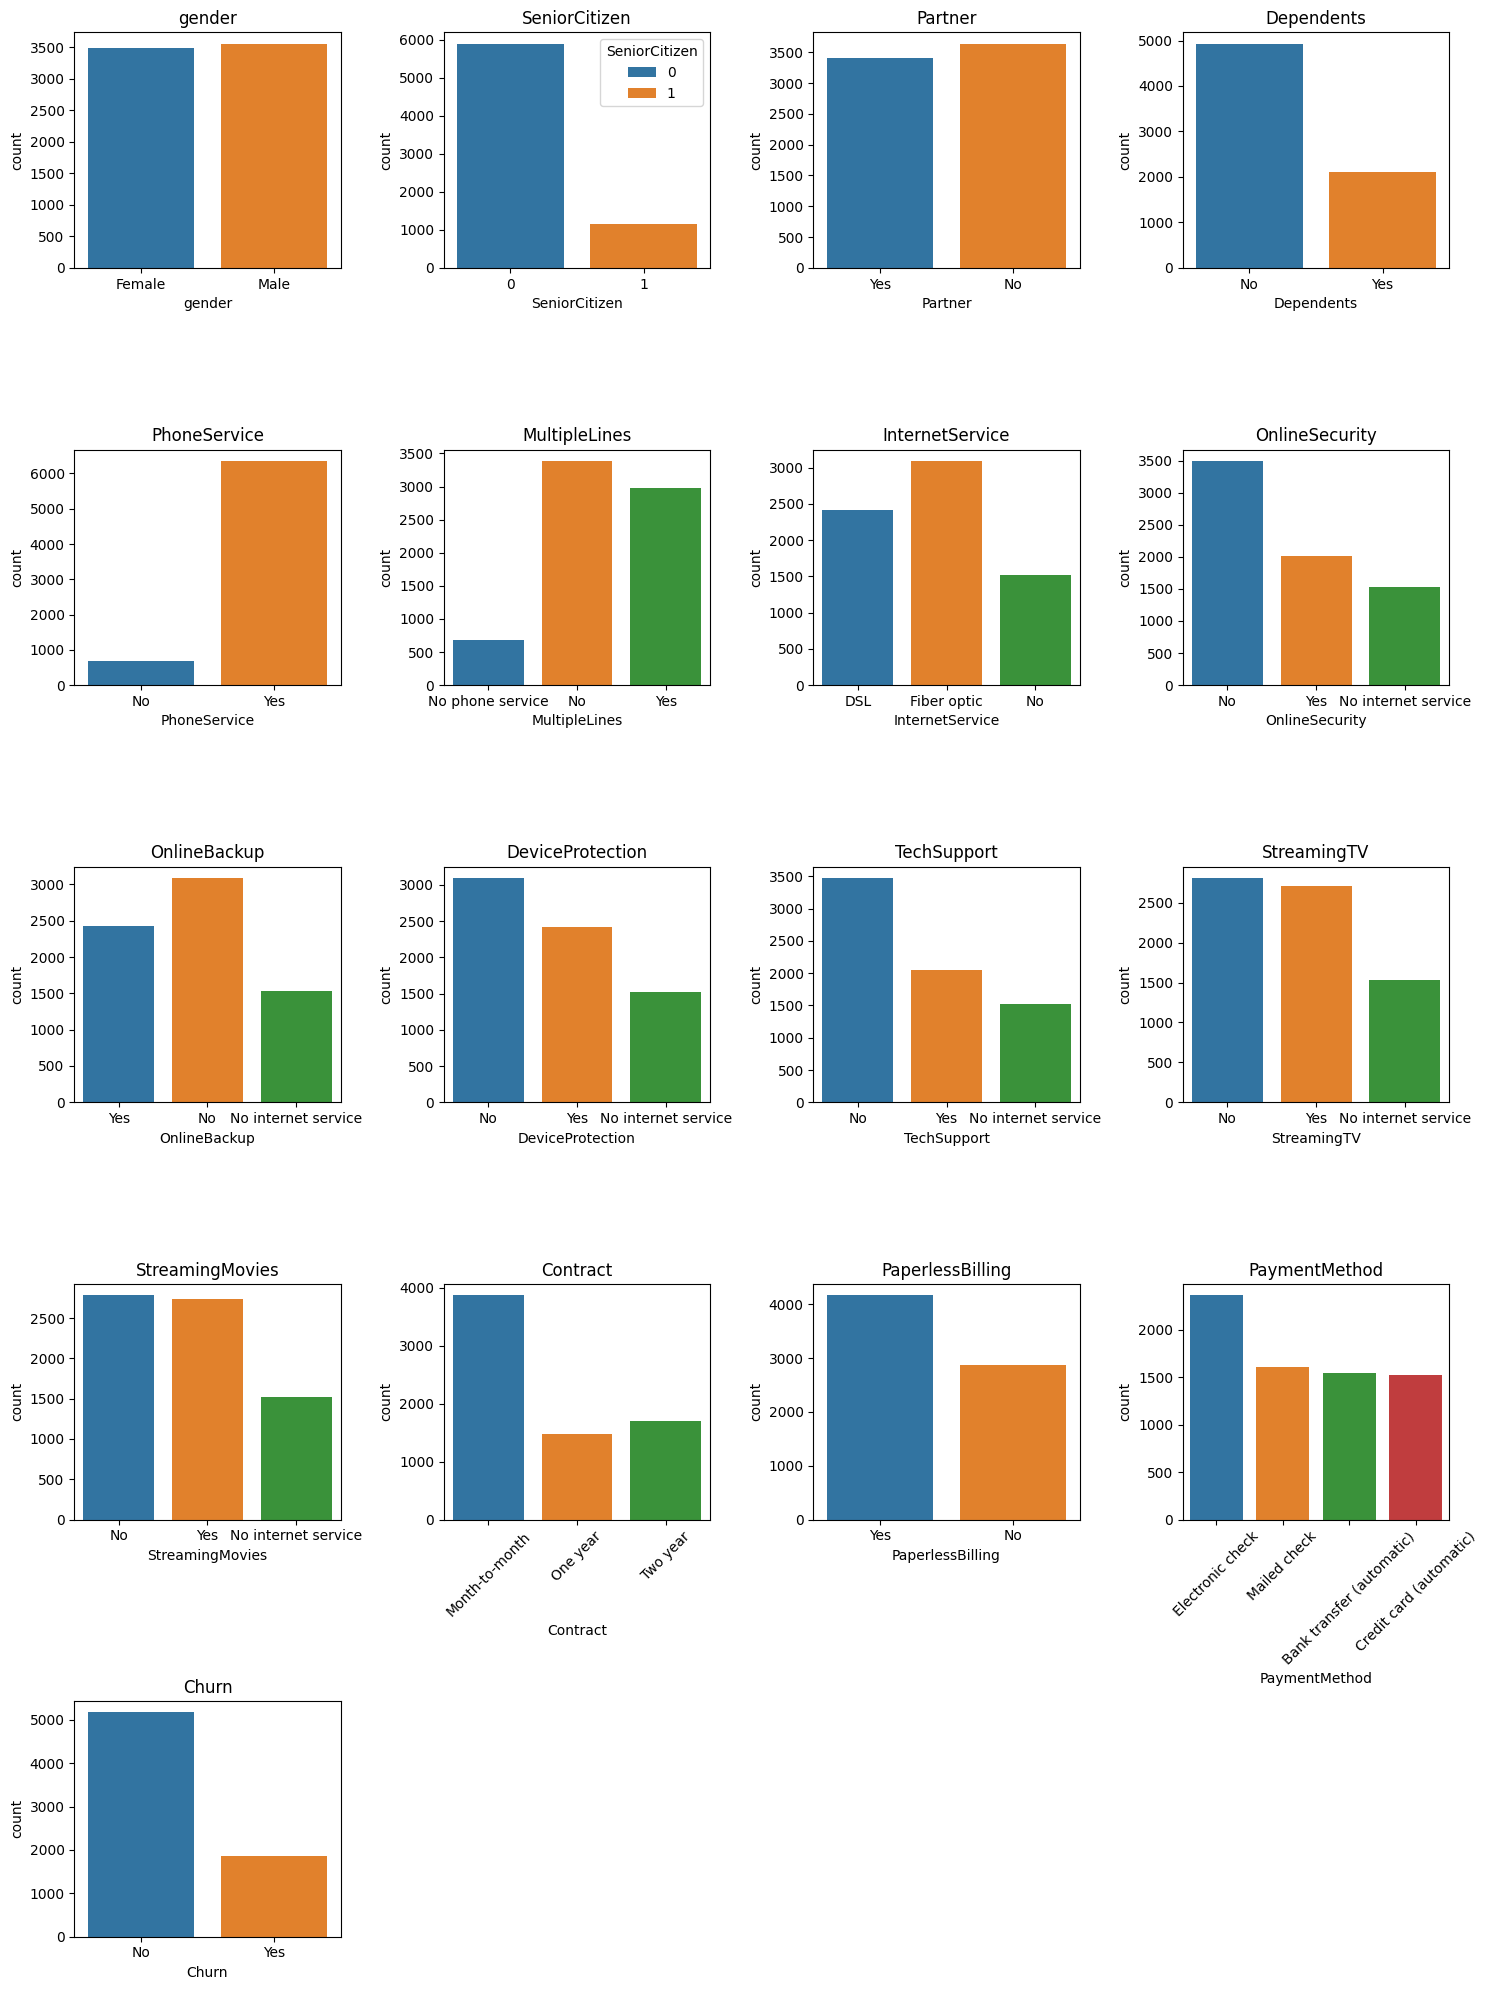

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(15, 20))

for i in range(len(categorical)):
  row = i // 4
  col = i % 4
  sns.countplot(x=categorical[i], data=df, ax=axes[row, col], hue=categorical[i])
  axes[row, col].set_title(categorical[i])

  if categorical[i] in ['Contract', 'PaymentMethod']:
    axes[row, col].tick_params(axis='x', rotation=45)

# Menghilangkan subplot yang tersisa (yang kosong)
for i in range(17, 20):
    fig.delaxes(axes[-1, i % 4])

plt.tight_layout()
plt.show()

Untuk persebaran data gender dan partner hampir seimbang dimana male dan single adalah yang paling tinggi di kedua kolom tersebut. Sedangkan untuk data SeniorCitizen didominasi oleh non senior citizen dengan customer yang senior citizen hanya kurang lebih 1000. Pada kolom dependents, didapat bahwa mayoritas customer tidak punya tanggungan dimana yang punya tanggungan hanya sekitar 2000 orang. Mayoritas customer tentunya memiliki phone service dan kebanyakan tidak multiple lines. Akan tetapi, jumlah customer yang memiliki multiple lines cukup tinggi hanya selisih sekitar 400 saja dengan yang tidak memiliki multiple lines. Untuk internet service, Fiber Optic paling umum dimiliki yang kemudian disusul oleh DSL dan ada kurang lebih 500 orang yang tidak memiliki internet service. Fasilitas seperti online security, online backup, device protection, dan tech support masih jarang dimiliki oleh customer. Untuk jumlah pelanggan yang tidak memiliki layanan streaming tv dan streaming movies juga paling banyak di dua kolom tersebut namun hanya berselisih sedikit dengan yang memiliki yaitu hanya selisih sekitar 100 orang. Pelanggan masih banyak yang berlangganan secara bulanan namun cukup mengejutkan bahwa customer lebih banyak yang memilih 2 tahun daripada 1 tahun. Kebanyakan customer lebih cocok dengan paperless billing dan untuk metode pembayarannya banyak yang menggunakan electronic check. Akan tetapi persebaran data dari metode pembayaran lain cukup rata. Jumlah customer yang tidak churn jauh melampaui yang churn, sehingga bisa kita simpulkan bahwa masih banyak customer yang cocok dengan layanan dan biaya dari perusahaan.

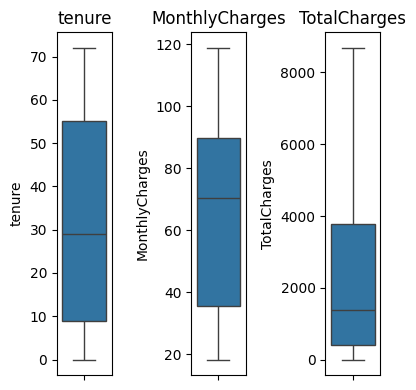

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(4, 4))

for i in range(3):
  sns.boxplot(df[numerical[i]], ax=axes[i])
  axes[i].set_title(numerical[i])

plt.tight_layout()
plt.show()

Dari grafik di atas, kita bisa simpulkan bahwa tidak ada outliers pada ketiga kolom numerik tersebut. Selanjutnya, kita akan cek distribusinya menggunakan distplot.

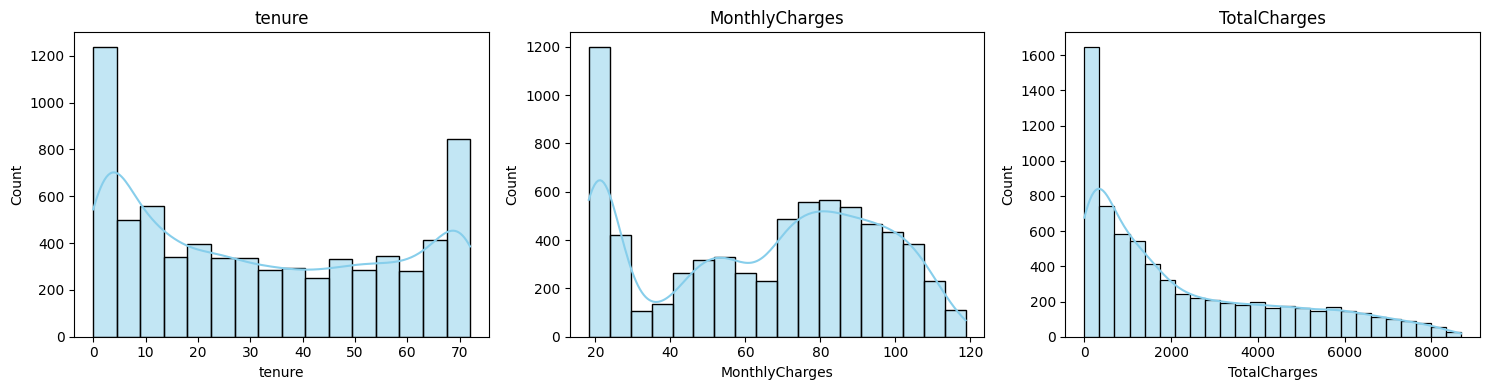

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i in range(3):
  sns.histplot(df[numerical[i]], ax=axes[i], kde=True, color='skyblue')
  axes[i].set_title(numerical[i])

plt.tight_layout()
plt.show()

Bisa kita lihat bahwa kolom tenure terdistribusi secara bimodal karena memiliki dua nilai puncak. Sedangkan kolom MonthlyCharges memiliki lebih dari dua puncak (multimodal) dan TotalCharges hanya satu puncak (unimodal). Kolam TotalCharges memiliki nilai mean > median sehingga distribusinya skew positif atau skew ke kanan. Selain itu apabila kita lihat nilai puncak dari ketiga kolom tersebut, kita bisa simpulkan, kebanyakan customer pada data:
1. Baru berlangganan selama kurang lebih 0-5 bulan
2. Biaya bulanannya disekitar 18-25 dollar
3. Total tagihannya hingga saat data dibuat adalah diantara 0-300 dollar


## c. Multivariate Analysis

Pertama, akan kita lihat korelas antar kolom numerik terlebih dahulu.

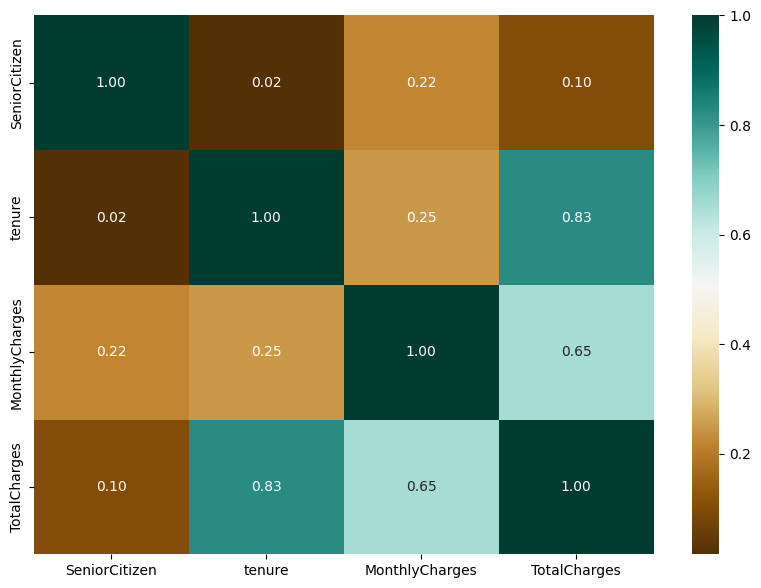

In [ ]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numerical_df.corr()

plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='BrBG')
plt.show()

Bisa kita lihat bahwa kolom tenure dengan total charges itu memiliki nilai korelasi yang sangat tinggi. Sehingga untuk keperluan model kita hanya perlu memilih salah satu dari kedua kolom tersebut. Hal ini masuk akal, karena semakin lama tenure dari customer maka semakin banyak total charges yang sudah dilakukan oleh customer. Adapun untuk kolom monthly charges berkorelasi positif dengan total charges yang artinya semakin tinggi monthly charges semakin tinggi juga total charges. Akan tetapi, kolom monthly charges dengan tenure meskipun berkorelasi positif namun angkanya sangat kecil yang menunjukkan korelasi yang sangat lemah. Di sisi lain, kolom senior citizen sebenarnya adalah data kategorikal sehingga kurang relevan apabila kita cek nilai korelasinya.

Selanjutnya, kita akan plot menggunakan pairplot.

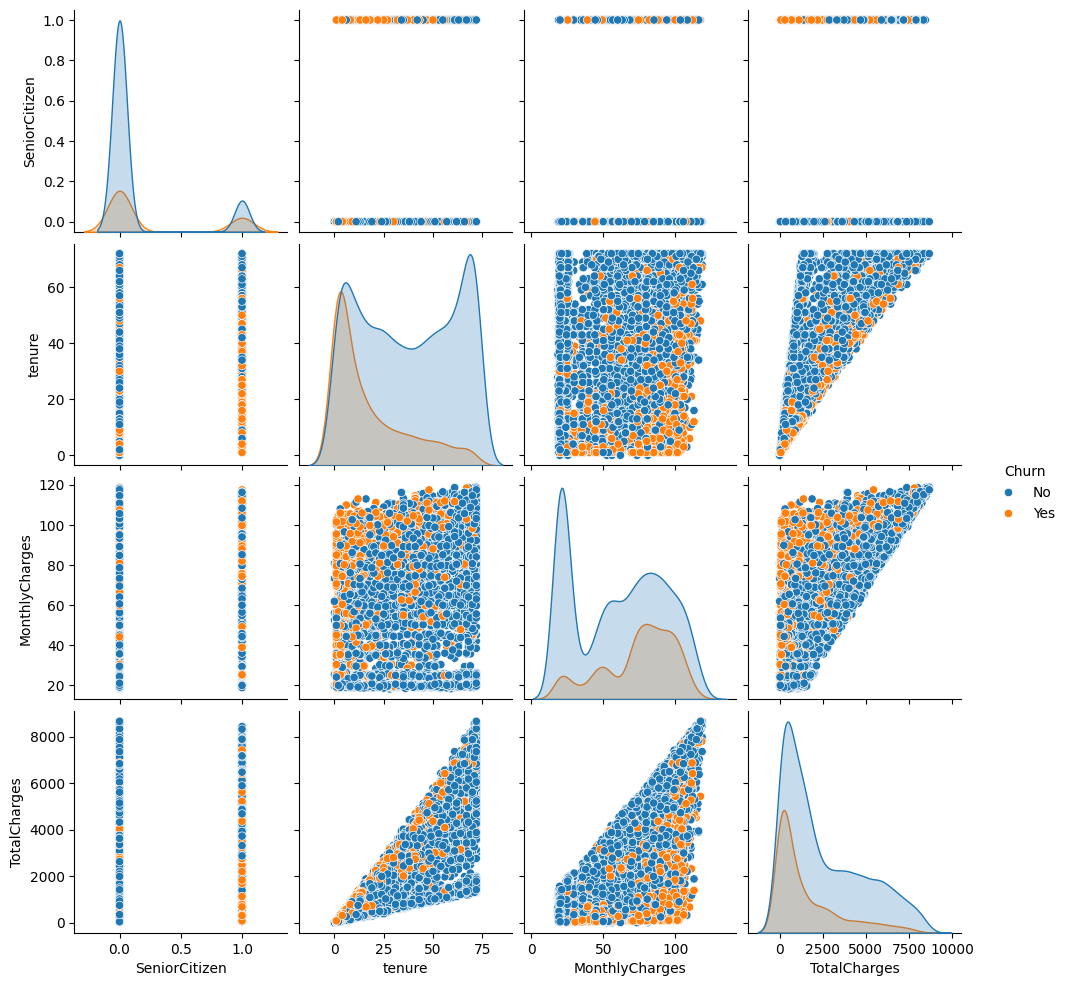

In [ ]:
sns.pairplot(df, hue='Churn')

Secara umum, bisa kita lihat bahwa untuk status senior citizen, kebanyakan dari customer yang churn adalah mereka yang berstatus sebagai senior citizen. Sedangkan untuk masa tenure yang paling banyak churn justru yang tenurenya masih pendek. Artinya, banyak dari customer baru yang tidak memperpanjang masa langganan. Di sisi lain, semakin tinggi monthly charges semakin besar peluang customer untuk churn yang bisa dilihat dari scatterplot antara tenure vs monthly charges. Sedangkan, untuk total charges, semakin lama tenure semakin tinggi total charges akan tetapi karena kebanyakan yang churn ada di bulan-bulan awal maka total charges yang masih kecil lah yang justru banyak dari customer yang churn. Selanjutnya, kita akan mencoba menganalisa beberapa kolom lain sedikit lebih dalam.

### Tenure vs Churn

Kita akan melihat hubungan antara lama tenure customer dengan status churn. Berikut adalah visualisasi distribusi dari tenure vs churn.

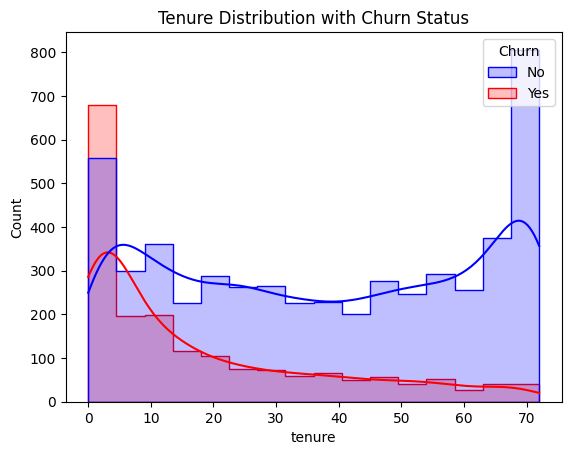

In [ ]:
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, element="step", palette=['Blue', 'Red'])
plt.title("Tenure Distribution with Churn Status")
plt.show()

Kita bisa lihat untuk customer yang churn terpusat pada customer yang baru-baru berlangganan yaitu di sekitar 0-5 bulan sedangkan semakin lama customer tetap berlangganan semakin kecil kecenderungan untuk churn. Di sisi lain, customer yang tidak churn hampir rata di setiap tenure meskipun ada dua puncak yaitu di awal berlangganan dan di masa berlangganan diatas 65 bulan yang menunjukkan banyak dari data adalah customer baru dan customer yang sudah lama berlangganan. Terlihat juga bahwa di masa awal, customer yang churn lebih banyak daripada yang tidak churn. Hal ini menunjukkan titik kritis di masa awal berlangganan sehingga perusahaan seharusnya membuat sebuah promosi atau fitur-fitur yang menarik agar customer mau untuk berlangganan lebih lama.

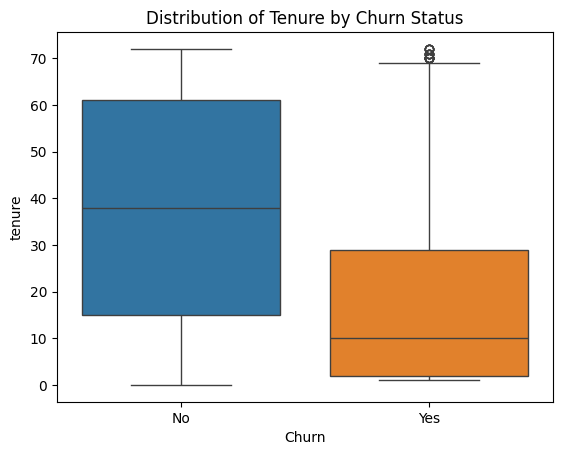

In [ ]:
sns.boxplot(x='Churn', y='tenure', hue='Churn', data=df)
plt.title("Distribution of Tenure by Churn Status")
plt.show()

Sesuai dengan visualisasi sebelumnya, bahwa anomali ketika ada customer yang sudah lama berlangganan dengan perusahaan tiba-tiba churn. Hal ini ditunjukkan oleh outliers dari data customer churn di atas.

### Monthly Charges vs Churn

Kemudian, kita akan melihat relasi antara biaya bulanan dengan churn status.

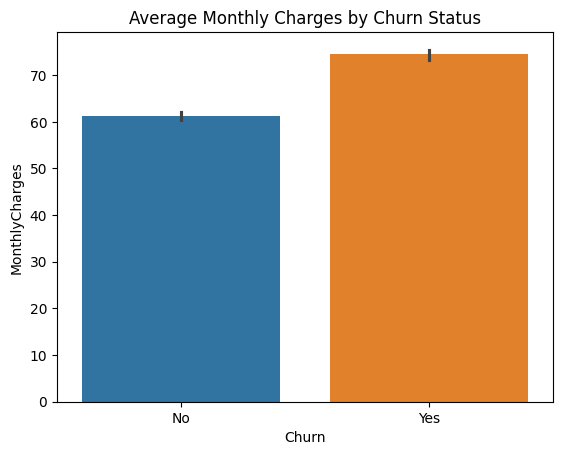

In [ ]:
sns.barplot(x='Churn', y='MonthlyCharges', hue='Churn', data=df, estimator=np.mean)
plt.title("Average Monthly Charges by Churn Status")
plt.show()

Dari grafik di atas kita mendapatkan insight bahwa biaya bulanan rata-rata dari customer yang churn itu cukup tinggi. Sehingga kita bisa simpulkan bahwa salah satu alasan dari churn nya seorang customer adalah karena biaya bulanan yang relatif tinggi.

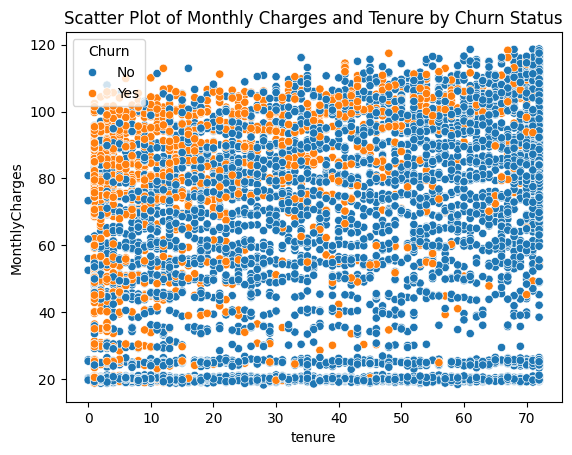

In [ ]:
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title("Scatter Plot of Monthly Charges and Tenure by Churn Status")
plt.show()

Selain itu, kesimpulan sebelumnya juga didukung oleh grafik scatterplot di atas. Customer yang churn terpusat pada customer yang baru berlangganan dan dengan biaya bulanan yang mahal. Sedangkan untuk biaya bulanan yang sama, semakin lama tenure mereka dengan perusahaan kecenderungan untuk churn menurun. Artinya selain dari promosi dan fitur-fitur yang menarik, biaya bulanan juga perlu diperhatikan agar customer yang baru berlangganan merasa pantas untuk mengeluarkan biaya tersebut dan berkeinginan untuk berlangganan lebih lama.

### Customer Identity vs Churn

Kita akan mencoba menganalisa customer identity berupa gender, senior citizen, partner, dan dependents terhadap churn status.

In [ ]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

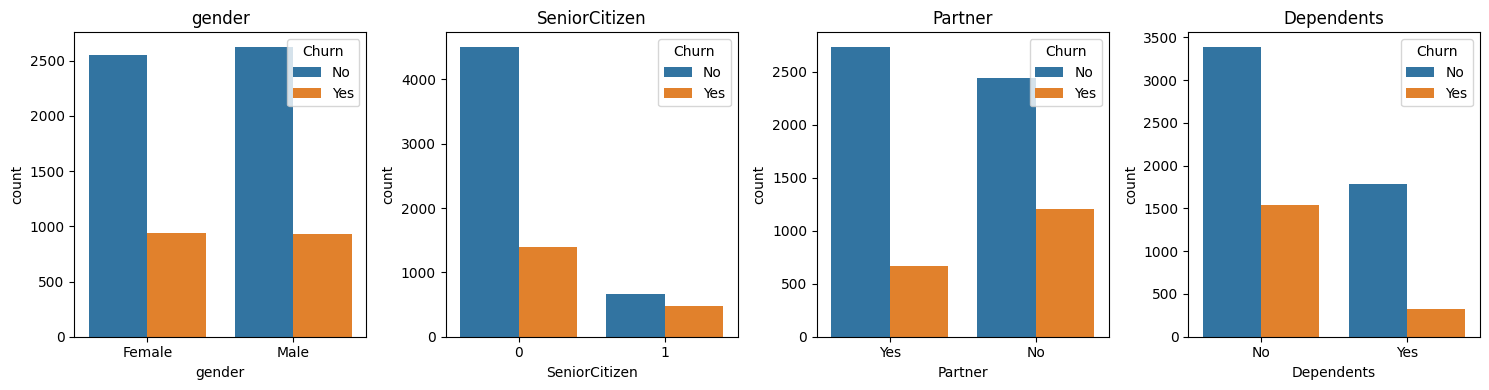

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

for i in range(4):
  sns.countplot(x=cols[i], data=df, ax=axes[i], hue='Churn')
  axes[i].set_title(cols[i])

plt.tight_layout()
plt.show()

Apabila dilihat dari identitas gender customer, kita bisa lihat bahwa antara baik male maupun female keduanya didominasi oleh data yang tidak churn. Adapun customer yang churn di dua gender tesebut relatif sama. Di sisi lain, untuk customer yang bukan senior citizen memiliki kecenderungan untuk tidak churn lebih tinggi ketimbang customer senior. Hal ini ditunjukkan oleh selisih jumlah customer churn dan tidak churn pada senior citizen yang sangat tipis. Kemungkinan customer yang sudah senior itu sudah tidak memerlukan perusahaan sehingga mungkin bisa dibuatkan sebuah promo khusus apabila status subscribe diberikan ke keturunannya atau ada diskon khusus untuk customer senior. Selisih customer churn dan tidak churn pada status partner customer sangat berbeda jauh yang menunjukkan peluang churn di kedua status partner lebih kecil jika dibandingkan dengan peluang tidak churn. Akan tetapi peluang churn itu lebih tinggi ketika customer tidak memiliki pasangan. Terakhir, kemungkinan dari customer churn dan tidak churn berdasarkan ada tidaknya dependents cenderung sama yang bisa kita lihat dari selisih customer churn dan tidak churn di kedua status dependents yang tidak berbeda jauh. Artinya kedua status dependent memiliki peluang yang hampir sama untuk churn.

### Services vs Churn

In [ ]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies']

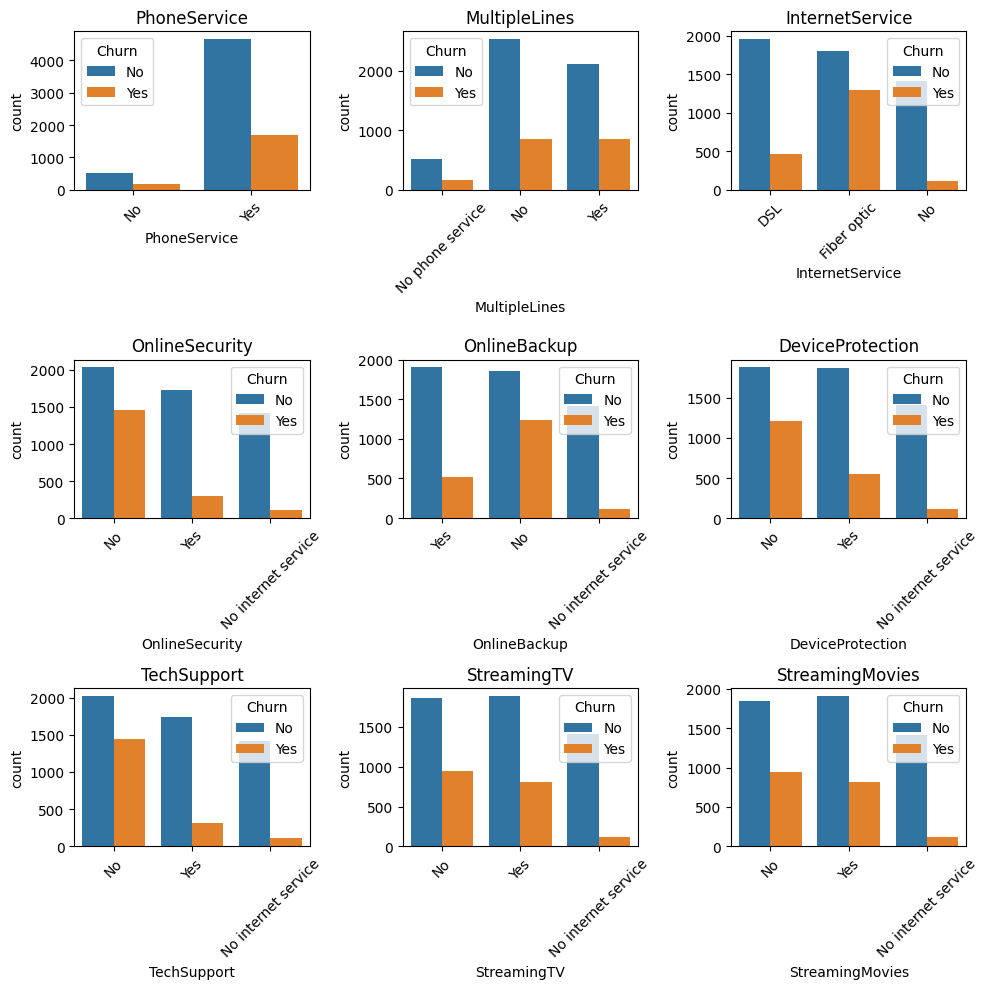

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i in range(len(columns)):
  row = i // 3
  col = i % 3
  sns.countplot(x=columns[i], data=df, ax=axes[row, col], hue='Churn')
  axes[row, col].set_title(columns[i])
  axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Mayoritas customer berlangganan phone service dengan perbandingan antara churn dan tidak churn kurang lebih 1800: 4700 sehingga peluang customer dengan phone service churn adalah $1800/(1800+4700) \approx 0.28$. Jadi, kemungkinan customer yang berlanggan phone service untuk churn cukup kecil. Begitupun dengan multiple lines, yang bisa kita lihat dari selisih antara churn dan tidak churn yang terpaut jauh untuk setiap kategori. Di sisi lain, pengguna fiber optic berpeluang churn lebih tinggi dibandingkan pengguna DSL ataupun yang tidak berlangganan layanan internet dengan peluang churn sekitar $1300/(1300+1900) \approx 0.41$. Artinya perusahaan seharusnya mengecek lebih jauh mengenai layanan fiber optic apakah biayanya terlalu mahal ataukah kualitasnya yang kurang mumpuni. Sedangkan customer - customer yang berlangganan internet service namun tidak berlangganan layanan tambahan yaitu online security, online backup, device protection, tech support, streaming tv, dan streaming movies justru berpeluang lebih tinggi untuk churn jika dibandingkan dengan pengguna yang berlangganan fitur tambahan tersebut ataupun yang tidak menggunakan layanan internet. Bisa kita simpulkan bahwa ketika customer berlangganan layanan internet dan kemudian ikut berlangganan fitur lain, customer akan merasa lebih nyaman sehingga peluang churn nya rendah. Oleh karena itu, perusahaan sepatutnya bisa memancing pengguna layanan internet service untuk berlangganan fitur lain agar mereka cenderung untuk tidak churn.

### Payment Method, Paperless Billing, and Contract vs Churn

Berikut ini kita akan coba cek Payment Method, Paperless Billing, and Contract terhadap Churn.

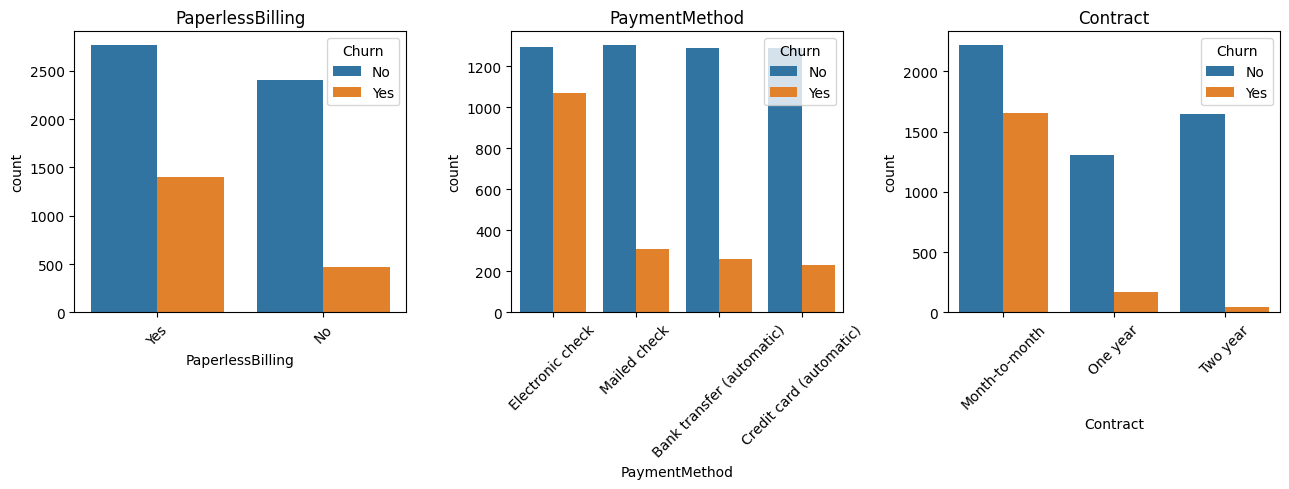

In [ ]:
cols = ['PaperlessBilling', 'PaymentMethod', 'Contract']

fig, axes = plt.subplots(1, 3, figsize=(13, 5))

for i in range(3):
  sns.countplot(x=cols[i], data=df, ax=axes[i], hue='Churn')
  axes[i].set_title(cols[i])
  axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Jika kita perhatikan, peluang customer churn paling tinggi adalah ketika customer melakukan pembayaran menggunakan paperless billing. Setelah kita cek pada metode pembayaran, electronic check lah yang paling banyak membuat customer churn. Sehingga, kita perlu cek pada layanan metode pembayaran electronic check apakah ada sesuatu yang membuat customer tidak nyaman sehingga mereka churn. Selanjutnya, sesuai dengan hasil analisa pada tenure, terlihat bahwa customer churn paling banyak dari customer yang berlangganan bulanan. Oleh karena itu, perusahaan seharusnya membuat campaign atau promo yang menarik agar customer percaya dan berani untuk berlangganan lebih lama atau bahkan berlangganan 1 tahunan ataupun 2 tahunan.

# 3. Deep Dive Exploration

## a. Pada contract month-to-month, manakah yang cenderung churn dari customer yang berlangganan internet service?

In [ ]:
filtered = df[df['Contract'] == 'Month-to-month']
grouped = filtered.groupby(['InternetService', 'Churn']).agg(Count=('Churn','count')).reset_index()
grouped

,InternetService,Churn,Count
0,DSL,No,829
1,DSL,Yes,394
2,Fiber optic,No,966
3,Fiber optic,Yes,1162
4,No,No,425
5,No,Yes,99


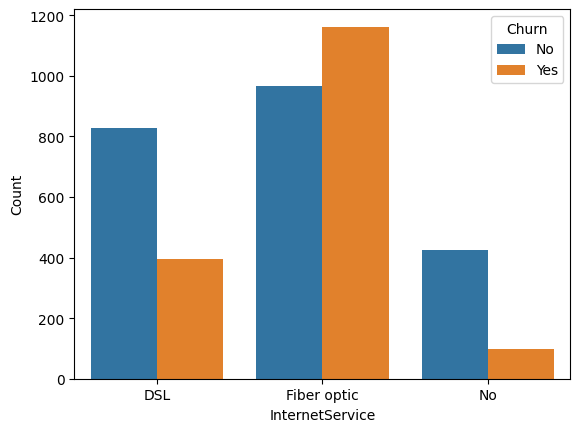

In [ ]:
sns.barplot(x='InternetService', y='Count', data = grouped, hue='Churn')
plt.show()

Dari beberapa visualisasi sebelumnya kita biasa melihat bahwa data churn selalu lebih rendah dari pada yang tidak churn sehingga hal ini sangat mengejutkan ketika kita melihat data churn dari kontrak bulanan dengan internet service fiber optic melampaui data tidak churn. Hal ini menunjukkan kemungkinan pelanggan dengan kontrak bulanan churn sangat tinggi. Oleh karena itu, perusahaan harus mengecek kondisi layanan fiber optic dan mencari tahu kenapa customer kurang nyaman dengan layanan fiber optic. Sehingga perusahaan dapat meningkatkan kualitas layanan dan mencegah lebih banyak customer churn.

## b. Apakah banyaknya layanan yang dibeli oleh customer mempengaruhi status churn customer?

Kita akan membuat sebuah kolom baru yang menghitung jumlah services yang dimiliki customer kemudian membandingkannya dengan churn. Pertama kita akan copy data dulu ke variabel baru agar tidak merusak data asli. Kemudian kita ubah data kategorikal menjadi 1 dan 0. Terakhir kita buat kolom untuk menghitung seluruh services yang dimiliki.

In [ ]:
new_df = df.copy()

In [ ]:
new_df['PhoneService'] = new_df['PhoneService'].replace({'Yes': 1, 'No': 0})
new_df['MultipleLines'] = new_df['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service':0})
new_df['InternetServiceCode'] = new_df['InternetService'].replace({'DSL': 1, 'No': 0, 'Fiber optic':1})
new_df['OnlineSecurity'] = new_df['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service':0})
new_df['OnlineBackup'] = new_df['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service':0})
new_df['DeviceProtection'] = new_df['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service':0})
new_df['TechSupport'] = new_df['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service':0})
new_df['StreamingTV'] = new_df['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service':0})
new_df['StreamingMovies'] = new_df['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service':0})

Sekarang kita buat kolom baru untuk menghitung total service.

In [ ]:
new_df['TotalServices'] = (new_df['PhoneService'] + new_df['MultipleLines'] + new_df['InternetServiceCode'] + new_df['OnlineSecurity'] + new_df['OnlineBackup']
                          + new_df['DeviceProtection'] + new_df['TechSupport'] + new_df['StreamingTV'] + new_df['StreamingMovies'])

Lalu akan kita visualisasi menggunakan bar plot.

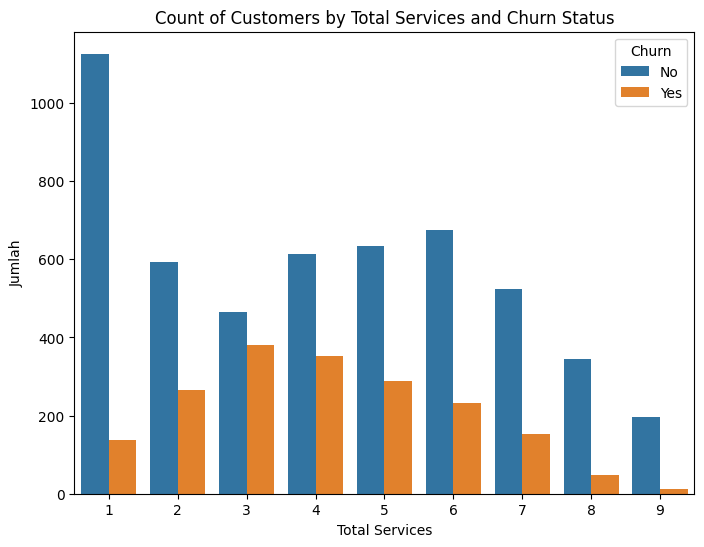

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TotalServices', hue='Churn', data=new_df)

plt.title('Count of Customers by Total Services and Churn Status')
plt.xlabel('Total Services')
plt.ylabel('Jumlah')

plt.show()

Bisa kita pelajari bahwa customer churn kebanyakan ada di customer yang memiliki 3 services. Jika kita perhatikan, inti dari services ada pada phone service dan internet service karena fitur lain adalah fitur - fitur tambahan seperti multiple line yang berkaitan dengan phone service dan online security dan seterusnya berkaitan dengan internet service. Artinya, jika ada 3 total service dan 2 diantaranya adalah phone service dan internet service, maka fitur - fitur tambahan tersebut perlu untuk ditingkatkan kualitasnya agar customer tidak churn. Namun, secara umum banyaknya fitur tidak terlalu berpengaruh terhadap status churn, karena jika kita lihat, setelah total services di atas 3 justru status churn jumlahnya semakin menurun.